In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
import graphviz
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('..\data\shortCleanData.csv')

In [4]:
#df = Mdf.sample(frac=1, random_state=42)
#df = df.iloc[:len(df)//4]
print(df.shape)
df.info()

(24639, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24639 entries, 0 to 24638
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   1-Abschluss                             24639 non-null  object
 1   1-Abschluss in DE                       24639 non-null  object
 2   1-Deutscher Ehepartner                  24639 non-null  object
 3   1-EB/NE erfllt?                         24639 non-null  object
 4   1-Einreisejahr                          24639 non-null  object
 5   1-Antrag EB                             24639 non-null  object
 6   1-Antrag NE                             24639 non-null  object
 7   1-Integrationstest                      24639 non-null  object
 8   1-Jahr AR beantragt/bekommen            24639 non-null  object
 9   1-Jobcenter                             24639 non-null  object
 10  1-Kinder                                24639 non-null  in

In [ ]:
#df.drop(df.select_dtypes(include=['datetime64']).columns, axis=1, inplace=True)
#df.drop(["Grund_der_Absage","sales","Mailing_State","filered_sales.Other_State","filered_sales.Other_City","filered_sales.First_Visited_URL","filered_sales.sales","filered_sales.Mailing_State","filered_sales.id","id.1","Owner.1","Owner.2"], axis=1, inplace=True)
#df.info()

In [5]:
from pycaret.classification import *

In [6]:
import category_encoders as ce

In [17]:
encoder = ce.GLMMEncoder()

In [19]:
#s = setup(df, target = 'SalesCount', ignore_features = ["Id","Zeitpunkt der Erstellung","Sales","Zeitpunkt der nderung","Zeitpunkt der Erstellung - Year","Zeitpunkt der nderung - Year"],max_encoding_ohe=50,normalize=True,normalize_method='robust')
#s = setup(df, target = 'SalesCount', ignore_features = ["Id","Zeitpunkt der Erstellung","Sales","Zeitpunkt der nderung","Zeitpunkt der Erstellung - Year","Zeitpunkt der nderung - Year"],max_encoding_ohe=5,encoding_method=encoder)

#s = setup(df, target = 'SalesCount', ignore_features = ["Id","Zeitpunkt der Erstellung","Sales","Zeitpunkt der nderung","Zeitpunkt der Erstellung - Year","Zeitpunkt der nderung - Year"],max_encoding_ohe=1,normalize=False,normalize_method='minmax',encoding_method=encoder,feature_selection=True,n_features_to_select=0.5,feature_selection_method='sequential',feature_selection_estimator='gbc')
s = setup(df, target = 'SalesCount', ignore_features = ["Id","Zeitpunkt der Erstellung","Sales","Zeitpunkt der nderung","Zeitpunkt der Erstellung - Year","Zeitpunkt der nderung - Year"],max_encoding_ohe=1,normalize=False,normalize_method='maxabs',encoding_method=encoder,ordinal_features = {'1-Netto' : ['0 bis 600', '600 bis 1000', '1000 bis 1500','1500 bis 2000','2000 bis 2500','2500 bis 3000','3000 bis 3500','Mehr als 3500'],'1-Sprachzertifikat':['Nein','A1','A2','B1','B2','C1','C2']})

,Description,Value
0,Session id,7381
1,Target,SalesCount
2,Target type,Binary
3,Original data shape,"(24639, 26)"
4,Transformed data shape,"(24639, 20)"
5,Transformed train set shape,"(17247, 20)"
6,Transformed test set shape,"(7392, 20)"
7,Ignore features,6
8,Ordinal features,2
9,Numeric features,1


In [15]:
test_Train = get_config("X_train_transformed")
test_Train

,1-Abschluss,1-Abschluss in DE,1-Deutscher Ehepartner,1-EB/NE erfllt?,1-Einreisejahr,1-Antrag EB,1-Antrag NE,1-Integrationstest,1-Jahr AR beantragt/bekommen,1-Jobcenter,1-Kinder,1-Netto,1-Rente,1-Sprachzertifikat,1-Test Sprache_Deutsch,1-Welches befristete AR haben Sie?,1-Wie ist ihr aktueller Familienstand?,1-Beratung?,1-Gltiger Nationalpass
12948,0.059199,0.059199,0.059199,0.059199,0.059199,0.059199,0.059199,0.059199,0.059199,0.059199,2.0,6.0,0.059199,3.0,1.0,0.059199,0.059199,1.0,0.059199
17177,0.059199,0.059199,0.059199,0.059199,0.059199,0.029599,0.059199,0.029599,0.059199,0.029599,2.0,7.0,0.029599,0.0,1.0,0.059199,0.029599,0.0,0.029599
6031,0.059199,0.059199,0.059199,0.029599,0.029599,0.019733,0.059199,0.059199,0.059199,0.059199,0.0,3.0,0.019733,6.0,1.0,0.059199,0.059199,1.0,0.019733
12797,0.029599,0.029599,0.029599,0.029599,0.059199,0.014800,0.059199,0.059199,0.059199,0.019733,1.0,6.0,0.014800,4.0,1.0,0.059199,0.019733,0.0,0.014800
6654,0.059199,0.019733,0.029599,0.019733,0.029599,0.011840,0.029599,0.029599,0.059199,0.029599,0.0,4.0,0.011840,4.0,1.0,0.029599,0.029599,1.0,0.011840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9353,0.057662,0.058174,0.059500,0.042230,0.064693,0.056050,0.049063,0.048499,0.042549,0.054720,0.0,4.0,0.058287,3.0,1.0,0.061079,0.059487,1.0,0.056313
20700,0.057308,0.058168,0.059494,0.058817,0.065696,0.068814,0.066972,0.064129,0.067608,0.070751,0.0,5.0,0.058282,4.0,1.0,0.067003,0.059481,0.0,0.056309
22858,0.057295,0.053941,0.064050,0.058811,0.039278,0.068778,0.049057,0.064123,0.039950,0.054716,0.0,1.0,0.058278,5.0,1.0,0.044733,0.057228,0.0,0.056306
2209,0.067103,0.067121,0.064038,0.058804,0.072496,0.056046,0.066962,0.048486,0.067596,0.070737,0.0,5.0,0.058274,3.0,1.0,0.066992,0.057220,1.0,0.056302


In [16]:
#best_model = compare_models(include=['nb'],sort='Recall')
# nb,lightgbm,gbc,lda
best_model = compare_models(sort='F1',cross_validation=False,probability_threshold=0.09)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7331,0.7778,0.6689,0.1381,0.2290,0.1450,0.2120,0.2100
et,Extra Trees Classifier,0.6419,0.7759,0.8584,0.1270,0.2212,0.1316,0.2345,0.3800
lr,Logistic Regression,0.6542,0.7848,0.8105,0.1255,0.2174,0.1279,0.2210,0.2400
gbc,Gradient Boosting Classifier,0.6925,0.7689,0.7100,0.1266,0.2149,0.1271,0.2012,7.7200
lightgbm,Light Gradient Boosting Machine,0.7620,0.7656,0.5457,0.1329,0.2137,0.1308,0.1768,0.3300
knn,K Neighbors Classifier,0.7687,0.6488,0.5091,0.1298,0.2069,0.1242,0.1644,0.2300
rf,Random Forest Classifier,0.6012,0.7572,0.8767,0.1171,0.2067,0.1141,0.2189,0.6900
nb,Naive Bayes,0.6406,0.7646,0.7877,0.1186,0.2062,0.1150,0.2025,0.2100
dt,Decision Tree Classifier,0.8547,0.5345,0.1712,0.0954,0.1225,0.0503,0.0528,0.5700
ada,Ada Boost Classifier,0.0593,0.7638,1.0000,0.0593,0.1119,0.0000,0.0000,1.6800


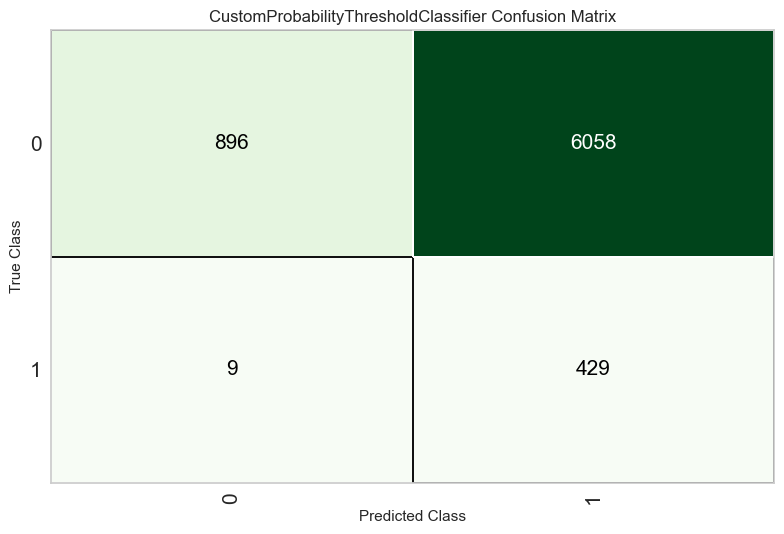

In [28]:
plot_model(best_model, plot = 'confusion_matrix')

In [ ]:
plot_model(best_model, plot = 'feature')

In [ ]:
# create copy of data
data_new = df.copy()
#data_new.drop('salesX', axis=1, inplace=True)
# generate labels using predict_model
finals=predict_model(best_model, data=data_new, raw_score=True)
finals.to_csv('shortSMOTE_LDA.csv', index=False)

In [ ]:
s2 = setup(df, target = 'Sales', ignore_features = ["Id"],fix_imbalance=True)

In [ ]:
best_model2 = compare_models(sort='Recall')

In [ ]:
plot_model(best_model2, plot = 'confusion_matrix')

In [ ]:
best_model3 = compare_models(include=['lda'],sort='Recall')

In [ ]:
plot_model(best_model3, plot = 'confusion_matrix')

In [ ]:
# create copy of data
#data_new = df.copy()
#data_new.drop('salesX', axis=1, inplace=True)
# generate labels using predict_model
finals=predict_model(best_model3, raw_score=True)
finals.to_csv('short_LDA.csv', index=False)

In [ ]:
best_model4 = compare_models(include=['gbc'],sort='Recall')

In [ ]:
plot_model(best_model4, plot = 'confusion_matrix')

In [ ]:
# # create a custom function
# def calculate_profit(y, y_pred):
#     tp = np.where((y_pred==1) & (y==1), (1500-15), 0)
#     fp = np.where((y_pred==1) & (y==0), -15, 0)
#     fn = np.where((y_pred==0) & (y==1), -1500, 0)
#     return np.sum([tp,fp,fn])
# # add metric to PyCaret
# add_metric('profit', 'Profit', calculate_profit)

def custom_metric(y,y_pred):
    tp = np.where((y_pred==1)&(y==1),1,0)
    fp = np.where((y_pred==1)&(y==0),-1,0)
    fn = np.where((y_pred==0)&(y==1),-0.5,0)
    return np.sum([tp,fp,np])

add_metric('customTest','CustomeTest',custom_metric)

In [ ]:
best_model5 = compare_models(probability_threshold=0.75,sort='Recall')

In [ ]:
plot_model(best_model5, plot = 'confusion_matrix')

In [ ]:
best_model6 = compare_models(include=['svm'],probability_threshold=0.75,sort='Recall')

In [ ]:
plot_model(best_model6, plot = 'confusion_matrix')

In [ ]:
plot_model(best_model, plot = 'confusion_matrix')